<center> <h1> Selecting the best GAN architecture (tunning parameters)</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

In [1]:
from utilities import EdwinRueda_utils
import tensorflow as tf
import numpy as np
import pandas as pd
from time import time
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
tf.keras.backend.set_floatx('float64')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, export_svgs
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource
%matplotlib inline
output_notebook()
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)

Loading BokehJS ...

tensorflow version:  2.2.0
numpy version:  1.18.1
matplotlib version:  3.1.1
sklearn version:  0.23.2


In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [3]:
rg = open("../data/reference_genes.txt").read().splitlines()
print(rg)

['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [4]:
rg_data = data.reindex(rg).dropna()
rg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


In [5]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(rg_data)
rg_data = scaler.transform(rg_data)
print("Reference genes scaled: ")
rg_data

Reference genes scaled: 


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


### bulding the best GAN architecture

In [8]:
noise_shape = 100
#generator network
G = Sequential()
G.add(Dense(50, input_shape=(noise_shape,), activation="tanh"))
G.add(Dense(150, activation="tanh"))
G.add(Dropout(.15))
G.add(Dense(150, activation="tanh"))
#G.add(Dropout(.15))
#G.add(Dense(30, activation="tanh"))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
#D.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D.add(Dense(60, input_shape=(rg_data.shape[1],)))
D.add(tf.keras.layers.LeakyReLU(alpha=.1))
D.add(Dropout(.15))
D.add(Dense(40))
D.add(Dropout(.1))
D.add(Dense(1, activation="sigmoid"))

In [9]:
noise_vector = tf.random.normal((4, noise_shape), dtype=tf.float64)
print("synthetic samples: ")
synthetic_samples = G(noise_vector)
print(synthetic_samples)
print("----------------------------------------")
print("prediction of the discriminator network")
print("----------------------------------------")
D(synthetic_samples)

synthetic samples: 
tf.Tensor(
[[-0.17383587 -0.15028173  0.22005642  0.423819   -0.49043528 -0.62683412
   0.07962849  0.41165468 -0.32220996]
 [-0.1239484   0.62163113 -0.38551844  0.66825684  0.33754883 -0.82283659
   0.79617369  0.4869846  -0.39198189]
 [-0.03655804  0.41620016  0.03225886 -0.43473023  0.03103074  0.59938803
  -0.62070273 -0.18376176  0.21125984]
 [-0.47318323  0.20590021  0.21154193 -0.1649222  -0.0050997   0.31463953
   0.01733472 -0.13827153 -0.12852095]], shape=(4, 9), dtype=float64)
----------------------------------------
prediction of the discriminator network
----------------------------------------


<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.46319891],
       [0.49788841],
       [0.44967666],
       [0.49730569]])>

In [10]:
gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1500
optimizerG = tf.optimizers.SGD(lr=.00013, momentum=.92, decay=.00013/epochs)
optimizerD = tf.optimizers.SGD(lr=.0015, momentum=.9, decay=.0015/epochs)
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_shape, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1500] :: G_loss[0.791626] :: D_loss[0.670334] :: time:1.172850[s]
epochs[1:1500] :: G_loss[0.818338] :: D_loss[0.706733] :: time:0.010844[s]
epochs[2:1500] :: G_loss[0.825895] :: D_loss[0.663979] :: time:0.010976[s]
epochs[3:1500] :: G_loss[0.775093] :: D_loss[0.679986] :: time:0.011280[s]
epochs[4:1500] :: G_loss[0.853747] :: D_loss[0.639916] :: time:0.010582[s]
epochs[5:1500] :: G_loss[0.781028] :: D_loss[0.676141] :: time:0.011130[s]
epochs[6:1500] :: G_loss[0.777880] :: D_loss[0.673475] :: time:0.012034[s]
epochs[7:1500] :: G_loss[0.843858] :: D_loss[0.659105] :: time:0.010305[s]
epochs[8:1500] :: G_loss[0.811942] :: D_loss[0.635974] :: time:0.011070[s]
epochs[9:1500] :: G_loss[0.827424] :: D_loss[0.665208] :: time:0.014998[s]
epochs[10:1500] :: G_loss[0.798114] :: D_loss[0.686102] :: time:0.011153[s]
epochs[11:1500] :: G_loss[0.909233] :: D_loss[0.614230] :: time:0.011568[s]
epochs[12:1500] :: G_loss[0.882899] :: D_loss[0.635859] :: time:0.011146[s]
epochs[13:1500] :: G_l

epochs[121:1500] :: G_loss[0.760145] :: D_loss[0.577368] :: time:0.014237[s]
epochs[122:1500] :: G_loss[0.730793] :: D_loss[0.575927] :: time:0.014771[s]
epochs[123:1500] :: G_loss[0.780703] :: D_loss[0.592952] :: time:0.018027[s]
epochs[124:1500] :: G_loss[0.689691] :: D_loss[0.634510] :: time:0.011837[s]
epochs[125:1500] :: G_loss[0.813805] :: D_loss[0.557492] :: time:0.011482[s]
epochs[126:1500] :: G_loss[0.773173] :: D_loss[0.568296] :: time:0.011444[s]
epochs[127:1500] :: G_loss[0.788523] :: D_loss[0.576481] :: time:0.011154[s]
epochs[128:1500] :: G_loss[0.735146] :: D_loss[0.570894] :: time:0.011034[s]
epochs[129:1500] :: G_loss[0.730327] :: D_loss[0.608259] :: time:0.010800[s]
epochs[130:1500] :: G_loss[0.820757] :: D_loss[0.535257] :: time:0.011746[s]
epochs[131:1500] :: G_loss[0.799311] :: D_loss[0.581822] :: time:0.011866[s]
epochs[132:1500] :: G_loss[0.759390] :: D_loss[0.577641] :: time:0.012242[s]
epochs[133:1500] :: G_loss[0.808192] :: D_loss[0.550454] :: time:0.012207[s]

epochs[243:1500] :: G_loss[0.931677] :: D_loss[0.502291] :: time:0.012483[s]
epochs[244:1500] :: G_loss[0.808694] :: D_loss[0.540118] :: time:0.012487[s]
epochs[245:1500] :: G_loss[0.847124] :: D_loss[0.525011] :: time:0.010853[s]
epochs[246:1500] :: G_loss[0.964842] :: D_loss[0.519899] :: time:0.010788[s]
epochs[247:1500] :: G_loss[0.839689] :: D_loss[0.536332] :: time:0.010768[s]
epochs[248:1500] :: G_loss[0.859934] :: D_loss[0.518582] :: time:0.011140[s]
epochs[249:1500] :: G_loss[0.919264] :: D_loss[0.486730] :: time:0.011018[s]
epochs[250:1500] :: G_loss[0.820324] :: D_loss[0.531428] :: time:0.010443[s]
epochs[251:1500] :: G_loss[0.920188] :: D_loss[0.505050] :: time:0.010896[s]
epochs[252:1500] :: G_loss[0.846499] :: D_loss[0.542673] :: time:0.010711[s]
epochs[253:1500] :: G_loss[0.899920] :: D_loss[0.546464] :: time:0.010627[s]
epochs[254:1500] :: G_loss[0.815053] :: D_loss[0.527906] :: time:0.011052[s]
epochs[255:1500] :: G_loss[0.883910] :: D_loss[0.517071] :: time:0.010736[s]

epochs[364:1500] :: G_loss[1.038451] :: D_loss[0.455206] :: time:0.014235[s]
epochs[365:1500] :: G_loss[0.954089] :: D_loss[0.552120] :: time:0.014609[s]
epochs[366:1500] :: G_loss[1.028339] :: D_loss[0.493282] :: time:0.013366[s]
epochs[367:1500] :: G_loss[0.992116] :: D_loss[0.486088] :: time:0.011853[s]
epochs[368:1500] :: G_loss[0.907372] :: D_loss[0.529327] :: time:0.011621[s]
epochs[369:1500] :: G_loss[1.050287] :: D_loss[0.484803] :: time:0.015054[s]
epochs[370:1500] :: G_loss[1.030693] :: D_loss[0.498916] :: time:0.011070[s]
epochs[371:1500] :: G_loss[0.867183] :: D_loss[0.528907] :: time:0.011443[s]
epochs[372:1500] :: G_loss[1.027589] :: D_loss[0.499421] :: time:0.011799[s]
epochs[373:1500] :: G_loss[1.030140] :: D_loss[0.470532] :: time:0.013103[s]
epochs[374:1500] :: G_loss[1.039831] :: D_loss[0.502490] :: time:0.013111[s]
epochs[375:1500] :: G_loss[0.926465] :: D_loss[0.533336] :: time:0.013696[s]
epochs[376:1500] :: G_loss[0.825166] :: D_loss[0.610106] :: time:0.012059[s]

epochs[483:1500] :: G_loss[0.913076] :: D_loss[0.558539] :: time:0.012697[s]
epochs[484:1500] :: G_loss[0.797570] :: D_loss[0.599069] :: time:0.016020[s]
epochs[485:1500] :: G_loss[1.024548] :: D_loss[0.508894] :: time:0.013101[s]
epochs[486:1500] :: G_loss[0.934901] :: D_loss[0.533442] :: time:0.011218[s]
epochs[487:1500] :: G_loss[0.976043] :: D_loss[0.525895] :: time:0.013793[s]
epochs[488:1500] :: G_loss[0.973592] :: D_loss[0.541740] :: time:0.012919[s]
epochs[489:1500] :: G_loss[1.025268] :: D_loss[0.552931] :: time:0.012774[s]
epochs[490:1500] :: G_loss[0.975459] :: D_loss[0.526484] :: time:0.010611[s]
epochs[491:1500] :: G_loss[1.099225] :: D_loss[0.459498] :: time:0.011606[s]
epochs[492:1500] :: G_loss[1.107943] :: D_loss[0.501504] :: time:0.010767[s]
epochs[493:1500] :: G_loss[0.935366] :: D_loss[0.562973] :: time:0.010975[s]
epochs[494:1500] :: G_loss[0.869126] :: D_loss[0.551487] :: time:0.011275[s]
epochs[495:1500] :: G_loss[0.957593] :: D_loss[0.582331] :: time:0.010533[s]

epochs[603:1500] :: G_loss[0.790683] :: D_loss[0.681125] :: time:0.011671[s]
epochs[604:1500] :: G_loss[0.853864] :: D_loss[0.659744] :: time:0.016049[s]
epochs[605:1500] :: G_loss[0.880309] :: D_loss[0.610673] :: time:0.012044[s]
epochs[606:1500] :: G_loss[0.979216] :: D_loss[0.593599] :: time:0.010964[s]
epochs[607:1500] :: G_loss[0.873469] :: D_loss[0.635161] :: time:0.011489[s]
epochs[608:1500] :: G_loss[0.918483] :: D_loss[0.626976] :: time:0.011402[s]
epochs[609:1500] :: G_loss[0.826434] :: D_loss[0.652524] :: time:0.011467[s]
epochs[610:1500] :: G_loss[0.853144] :: D_loss[0.638356] :: time:0.011448[s]
epochs[611:1500] :: G_loss[0.781708] :: D_loss[0.668723] :: time:0.011314[s]
epochs[612:1500] :: G_loss[0.892466] :: D_loss[0.603085] :: time:0.012780[s]
epochs[613:1500] :: G_loss[1.050247] :: D_loss[0.556163] :: time:0.012854[s]
epochs[614:1500] :: G_loss[0.854580] :: D_loss[0.635076] :: time:0.010732[s]
epochs[615:1500] :: G_loss[0.840648] :: D_loss[0.631238] :: time:0.011006[s]

epochs[719:1500] :: G_loss[0.990343] :: D_loss[0.573895] :: time:0.012165[s]
epochs[720:1500] :: G_loss[0.831564] :: D_loss[0.675158] :: time:0.014590[s]
epochs[721:1500] :: G_loss[0.837947] :: D_loss[0.722744] :: time:0.010919[s]
epochs[722:1500] :: G_loss[0.863258] :: D_loss[0.724998] :: time:0.010969[s]
epochs[723:1500] :: G_loss[0.751508] :: D_loss[0.733970] :: time:0.010829[s]
epochs[724:1500] :: G_loss[0.944555] :: D_loss[0.619279] :: time:0.012555[s]
epochs[725:1500] :: G_loss[0.975112] :: D_loss[0.630970] :: time:0.015760[s]
epochs[726:1500] :: G_loss[0.753662] :: D_loss[0.683503] :: time:0.020623[s]
epochs[727:1500] :: G_loss[0.864744] :: D_loss[0.647955] :: time:0.018953[s]
epochs[728:1500] :: G_loss[0.929787] :: D_loss[0.647719] :: time:0.014019[s]
epochs[729:1500] :: G_loss[0.831151] :: D_loss[0.674097] :: time:0.011405[s]
epochs[730:1500] :: G_loss[0.889360] :: D_loss[0.690018] :: time:0.012280[s]
epochs[731:1500] :: G_loss[0.842087] :: D_loss[0.678473] :: time:0.013935[s]

epochs[840:1500] :: G_loss[0.824865] :: D_loss[0.678539] :: time:0.012053[s]
epochs[841:1500] :: G_loss[0.827609] :: D_loss[0.674508] :: time:0.015176[s]
epochs[842:1500] :: G_loss[0.834479] :: D_loss[0.680890] :: time:0.011452[s]
epochs[843:1500] :: G_loss[0.903990] :: D_loss[0.654920] :: time:0.011215[s]
epochs[844:1500] :: G_loss[0.880866] :: D_loss[0.637186] :: time:0.010847[s]
epochs[845:1500] :: G_loss[0.881869] :: D_loss[0.652203] :: time:0.010733[s]
epochs[846:1500] :: G_loss[0.790129] :: D_loss[0.693959] :: time:0.011150[s]
epochs[847:1500] :: G_loss[0.840298] :: D_loss[0.674236] :: time:0.012921[s]
epochs[848:1500] :: G_loss[0.861592] :: D_loss[0.641103] :: time:0.010592[s]
epochs[849:1500] :: G_loss[0.713758] :: D_loss[0.715897] :: time:0.010615[s]
epochs[850:1500] :: G_loss[0.829809] :: D_loss[0.702912] :: time:0.010758[s]
epochs[851:1500] :: G_loss[0.869376] :: D_loss[0.677529] :: time:0.011129[s]
epochs[852:1500] :: G_loss[0.791092] :: D_loss[0.655078] :: time:0.010627[s]

epochs[950:1500] :: G_loss[0.747375] :: D_loss[0.687407] :: time:0.014365[s]
epochs[951:1500] :: G_loss[0.881662] :: D_loss[0.692276] :: time:0.013590[s]
epochs[952:1500] :: G_loss[0.827820] :: D_loss[0.680454] :: time:0.011178[s]
epochs[953:1500] :: G_loss[0.885804] :: D_loss[0.637480] :: time:0.010630[s]
epochs[954:1500] :: G_loss[0.846466] :: D_loss[0.678360] :: time:0.011166[s]
epochs[955:1500] :: G_loss[0.846228] :: D_loss[0.657968] :: time:0.010591[s]
epochs[956:1500] :: G_loss[0.836694] :: D_loss[0.672066] :: time:0.010772[s]
epochs[957:1500] :: G_loss[0.793588] :: D_loss[0.698022] :: time:0.010952[s]
epochs[958:1500] :: G_loss[0.833373] :: D_loss[0.666020] :: time:0.010449[s]
epochs[959:1500] :: G_loss[0.751909] :: D_loss[0.696610] :: time:0.010861[s]
epochs[960:1500] :: G_loss[0.790959] :: D_loss[0.709383] :: time:0.010966[s]
epochs[961:1500] :: G_loss[0.858975] :: D_loss[0.652824] :: time:0.010763[s]
epochs[962:1500] :: G_loss[0.814816] :: D_loss[0.686909] :: time:0.011072[s]

epochs[1063:1500] :: G_loss[0.735748] :: D_loss[0.681685] :: time:0.012219[s]
epochs[1064:1500] :: G_loss[0.778089] :: D_loss[0.676428] :: time:0.012401[s]
epochs[1065:1500] :: G_loss[0.855109] :: D_loss[0.631836] :: time:0.011178[s]
epochs[1066:1500] :: G_loss[0.771340] :: D_loss[0.692590] :: time:0.011333[s]
epochs[1067:1500] :: G_loss[0.841818] :: D_loss[0.651855] :: time:0.011260[s]
epochs[1068:1500] :: G_loss[0.896117] :: D_loss[0.622935] :: time:0.010958[s]
epochs[1069:1500] :: G_loss[0.927621] :: D_loss[0.611061] :: time:0.010620[s]
epochs[1070:1500] :: G_loss[0.753443] :: D_loss[0.674089] :: time:0.010806[s]
epochs[1071:1500] :: G_loss[0.850022] :: D_loss[0.631183] :: time:0.010659[s]
epochs[1072:1500] :: G_loss[0.848255] :: D_loss[0.639260] :: time:0.011200[s]
epochs[1073:1500] :: G_loss[0.823520] :: D_loss[0.680357] :: time:0.010940[s]
epochs[1074:1500] :: G_loss[0.796772] :: D_loss[0.657929] :: time:0.011065[s]
epochs[1075:1500] :: G_loss[0.805139] :: D_loss[0.662688] :: tim

epochs[1175:1500] :: G_loss[0.863959] :: D_loss[0.641002] :: time:0.011500[s]
epochs[1176:1500] :: G_loss[0.782484] :: D_loss[0.672882] :: time:0.012885[s]
epochs[1177:1500] :: G_loss[0.866786] :: D_loss[0.654741] :: time:0.010770[s]
epochs[1178:1500] :: G_loss[0.792709] :: D_loss[0.651012] :: time:0.010469[s]
epochs[1179:1500] :: G_loss[0.763963] :: D_loss[0.674285] :: time:0.011282[s]
epochs[1180:1500] :: G_loss[0.764219] :: D_loss[0.651384] :: time:0.010628[s]
epochs[1181:1500] :: G_loss[0.809950] :: D_loss[0.656463] :: time:0.010456[s]
epochs[1182:1500] :: G_loss[0.855534] :: D_loss[0.627809] :: time:0.010427[s]
epochs[1183:1500] :: G_loss[0.819340] :: D_loss[0.638693] :: time:0.015125[s]
epochs[1184:1500] :: G_loss[0.765783] :: D_loss[0.681274] :: time:0.011088[s]
epochs[1185:1500] :: G_loss[0.826232] :: D_loss[0.649639] :: time:0.010401[s]
epochs[1186:1500] :: G_loss[0.793559] :: D_loss[0.635916] :: time:0.010667[s]
epochs[1187:1500] :: G_loss[0.725729] :: D_loss[0.668054] :: tim

epochs[1289:1500] :: G_loss[0.798202] :: D_loss[0.648790] :: time:0.013120[s]
epochs[1290:1500] :: G_loss[0.739513] :: D_loss[0.682756] :: time:0.012606[s]
epochs[1291:1500] :: G_loss[0.785054] :: D_loss[0.631051] :: time:0.010452[s]
epochs[1292:1500] :: G_loss[0.810765] :: D_loss[0.644772] :: time:0.010665[s]
epochs[1293:1500] :: G_loss[0.760742] :: D_loss[0.665017] :: time:0.010400[s]
epochs[1294:1500] :: G_loss[0.815043] :: D_loss[0.622888] :: time:0.010581[s]
epochs[1295:1500] :: G_loss[0.776714] :: D_loss[0.645785] :: time:0.010448[s]
epochs[1296:1500] :: G_loss[0.797608] :: D_loss[0.635209] :: time:0.010348[s]
epochs[1297:1500] :: G_loss[0.795771] :: D_loss[0.645119] :: time:0.010552[s]
epochs[1298:1500] :: G_loss[0.804090] :: D_loss[0.650821] :: time:0.010736[s]
epochs[1299:1500] :: G_loss[0.771738] :: D_loss[0.664304] :: time:0.010407[s]
epochs[1300:1500] :: G_loss[0.800016] :: D_loss[0.667122] :: time:0.010388[s]
epochs[1301:1500] :: G_loss[0.825313] :: D_loss[0.648721] :: tim

epochs[1402:1500] :: G_loss[0.784153] :: D_loss[0.650626] :: time:0.011163[s]
epochs[1403:1500] :: G_loss[0.749964] :: D_loss[0.687476] :: time:0.013970[s]
epochs[1404:1500] :: G_loss[0.703712] :: D_loss[0.681547] :: time:0.010750[s]
epochs[1405:1500] :: G_loss[0.783499] :: D_loss[0.668993] :: time:0.010336[s]
epochs[1406:1500] :: G_loss[0.746793] :: D_loss[0.654906] :: time:0.010696[s]
epochs[1407:1500] :: G_loss[0.778075] :: D_loss[0.645811] :: time:0.010429[s]
epochs[1408:1500] :: G_loss[0.851094] :: D_loss[0.620613] :: time:0.010543[s]
epochs[1409:1500] :: G_loss[0.806875] :: D_loss[0.645308] :: time:0.010548[s]
epochs[1410:1500] :: G_loss[0.772309] :: D_loss[0.639109] :: time:0.010362[s]
epochs[1411:1500] :: G_loss[0.860299] :: D_loss[0.615439] :: time:0.010598[s]
epochs[1412:1500] :: G_loss[0.790958] :: D_loss[0.660384] :: time:0.010441[s]
epochs[1413:1500] :: G_loss[0.851652] :: D_loss[0.609806] :: time:0.010482[s]
epochs[1414:1500] :: G_loss[0.829772] :: D_loss[0.624885] :: tim

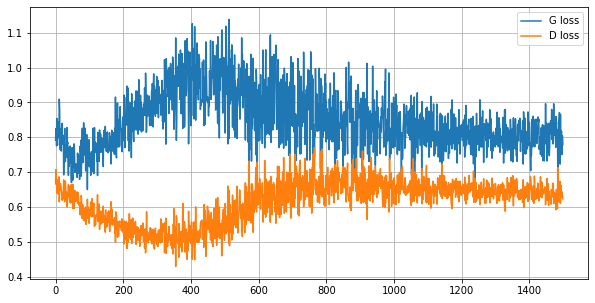

In [17]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss")
plt.plot(range(epochs), accumulated_dloss, label="D loss")
plt.legend()
plt.grid();

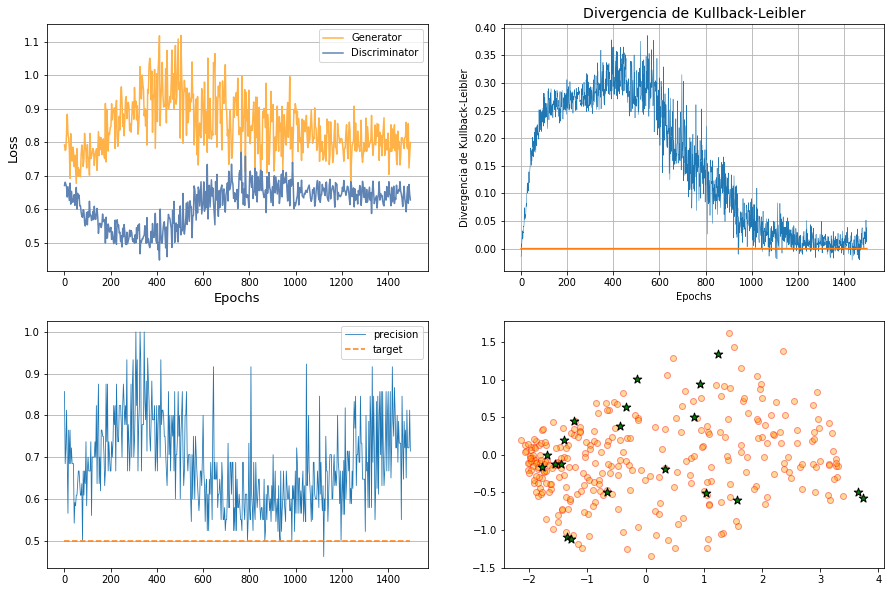

In [18]:
r = gan_utils.plot_results(syn_size=300);

In [19]:
bokeh_utils = EdwinRueda_utils.bokeh_utils()

precision, kld, loss_g, loss_d =  gan_utils.get_metrics(num_iter=200)
[pl, pq1, pq2, pq3, pu], pouts = bokeh_utils.boxtplot_values(np.array(precision), True, True)
[kl, kq1, kq2, kq3, ku], kouts = bokeh_utils.boxtplot_values(np.array(kld), True, True)
[gl, gq1, gq2, gq3, gu], gouts = bokeh_utils.boxtplot_values(np.array(loss_g), True, True)
[dl, dq1, dq2, dq3, du], douts = bokeh_utils.boxtplot_values(np.array(loss_d), True, True)

In [20]:
cats = ["precision", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl, kl, gl, dl], width=.2, height=.001, line_color="black")
p.segment(cats, [pl, kl, gl, dl], cats, [pq1, kq1, gq1, dq1], line_color="black")
p.vbar(cats, width=.4, top=[pq2, kq2, gq2, dq2], bottom=[pq1, kq1, gq1, dq1], fill_color="#3B8686",
       line_color="black")
p.vbar(cats, width=.4, top=[pq3, kq3, gq3, dq3], bottom=[pq2, kq2, gq2, dq2], fill_color="#E08E79",
      line_color="black")
p.segment(cats, [pq3, kq3, gq3, dq3], cats, [pu, ku, gu, du], line_color="black")
p.rect(cats, [pu, ku, gu, du], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts, kouts, gouts, douts]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

In [8]:
init = tf.keras.initializers.glorot_uniform()
init_weights = []
for w in D.get_weights():
    #print(w.shape)
    #print(init(w.shape).shape)
    init_weights.append(init(w.shape))